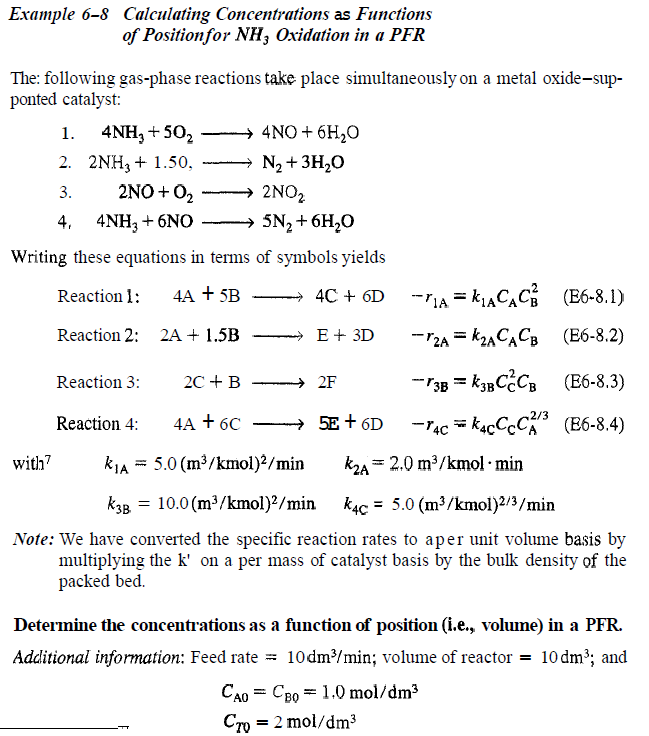

# Calculating Concentrations as Functions of Position for NH, Oxidation in a PFR

4NH3 + 5O2 -> 4NO + 6H2O
2NH3 + 1.502-> N2 + 3H2O
2NO + 02 ->  2N02
4NH3 + 6NO ->  5N2 + 6H20

k,, = 5.0 (m3/kmol)~/rnin k2,= 2.0 m3/kmol-min
k3B = 10.0 (m3/kmol)2/min k4c = 5.0 (m3/kmol)2'3/min
cAO = cBO = 1.0 mol /dm3

## Elements of Chemical Reaction Engineering, Scott Fogler, 3rd Edition, page 311

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

In [34]:
def fikret(Y, V): #name of a lovely professor from IZTECH.
    FA, FB, FC, FD, FE, FF = Y
    FT = FA + FB + FC + FD + FE +FF
    r1a = -5*8*(FA/FT)*((FB/FT)**2)
    r2a = -2*4*(FA/FT)*(FB/FT)
    r4c = -5*3.175*(FC/FT)*((FA/FT)**(2/3))
    r3b = -10*8*((FC/FT)**2)*(FB/FT)
    CA = 2*(FA/FT)
    rA = r1a + r2a+ 2*r4c/3
    rB = 1.25*r1a+0.75*r2a+r3b
    rC = -r1a+2*r3b+r4c
    rD = -1.5*r1a-1.55*r2a-r4c
    rE = -0.5*r2a-5*r4c/6
    rF = -2*r3b
    
    dFadV = rA
    dFbdV = rB
    dFcdV = rC
    dFddV = rD
    dFedV = rE
    dFfdV = rF
    
    return [dFadV, dFbdV, dFcdV, dFddV, dFedV, dFfdV]


Text(0,0.5,'F(mol/min)')

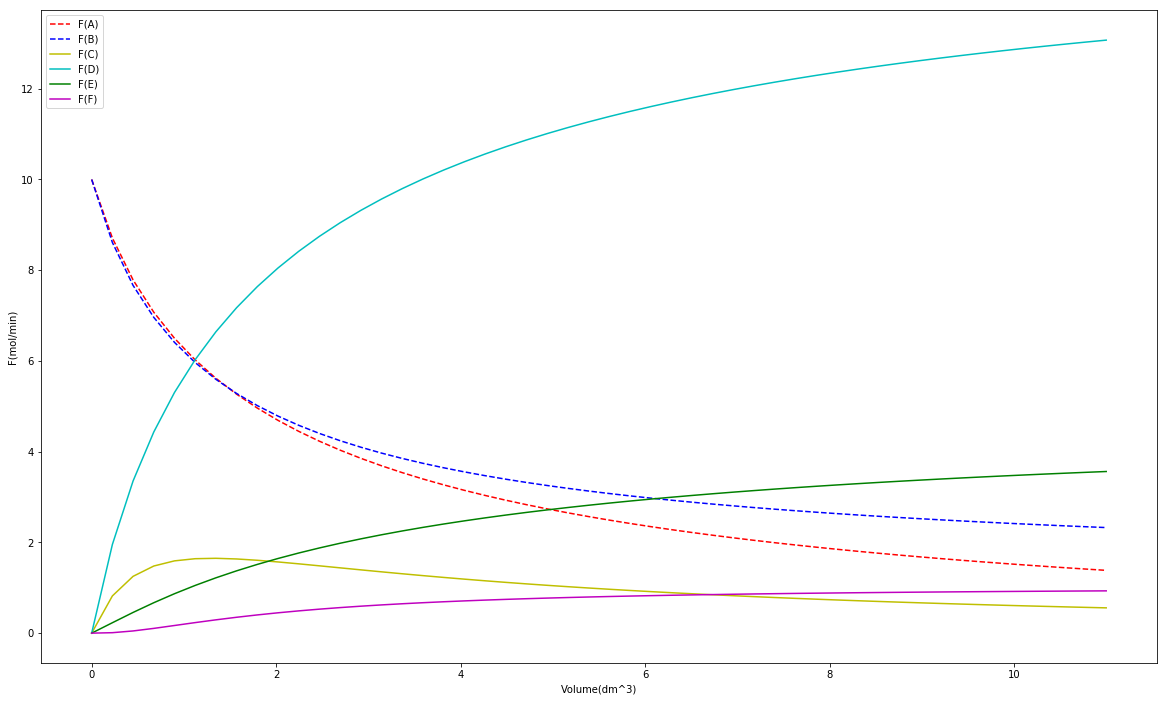

In [35]:
v0 = np.linspace(0,11)
Y0 = [10, 10, 0, 0, 0, 0]



y= odeint(fikret, Y0, v0)

dFadV = y[:,0]
dFbdV = y[:,1]
dFcdV = y[:,2]
dFddV = y[:,3]
dFedV = y[:,4]
dFfdV = y[:,5]

plt.figure(figsize=(20,12))
plt.plot(v0,dFadV, "r--", label="F(A)")
plt.plot(v0,dFbdV, "b--", label="F(B)")
plt.plot(v0,dFcdV, "y-", label="F(C)")
plt.plot(v0,dFddV, "c-", label="F(D)")
plt.plot(v0,dFedV, "g-", label="F(E)")
plt.plot(v0,dFfdV, "m-", label="F(F)")
plt.legend()
plt.xlabel("Volume(dm^3)")
plt.ylabel("F(mol/min)")